In [1]:
import networkx as nx
import numpy as np
import json
from tqdm.notebook import tqdm

In [2]:
import matplotlib.pyplot as plt

In [3]:
def generate_graph():
    n_nodes = np.random.randint(15,50)
    G = nx.connected_watts_strogatz_graph(n_nodes,4,1)
    
    reverse_edges = [(e[1],e[0]) for e in G.edges]
    G.add_edges_from(reverse_edges)
    
    node_positions = -1+2*np.random.rand(n_nodes,2)

    node_attributes = np.zeros((n_nodes,2) ) #np.column_stack( ( node_positions, np.zeros((n_nodes,2) ) ) )

    pos = {i:node_positions[i] for i in range(n_nodes)}

    distances = {e: np.linalg.norm(pos[e[0]]-pos[e[1]]) for e in G.edges}

    nx.set_edge_attributes(G,distances,'distance')

    perm = np.random.permutation(range(n_nodes))
    start_idx = 0
    end_idx = 1
    
    
    
    start = perm[start_idx]
    end = perm[end_idx]
    
    path = []
    
    iterations = 0
    
    while len(path) < 5:
        
        end_idx = 0
        while not nx.has_path(G, start, end):
            iterations+=1
        
            if iterations > 10:
                return generate_graph()
        
            if end_idx+1 == start_idx:
                continue
            end = perm[end_idx+1]
            end_idx+=1
            if end_idx > len(perm)-2:
                end_idx = 0
                start_idx+=1
                start = perm[start_idx]
        path = nx.shortest_path(G,start,end,'distance')
        if len(path) < 5:
            start_idx+=1
            if start_idx > len(perm)-1:
                return generate_graph()
            start = perm[start_idx]
        
    node_attributes[start][0] = 1
    node_attributes[end][1] = 1

    nx.set_node_attributes(G,{i: list(node_attributes[i]) for i in range(n_nodes)},'node_features')
    
    

    distances = {e: np.linalg.norm(pos[e[0]]-pos[e[1]]) for e in G.edges}
    nx.set_edge_attributes(G,distances,'distance')

    edge_on_path = {e: 0 for e in G.edges}

    for path_i in range(len(path)-1):
        s,e = path[path_i],path[path_i+1]
        edge_on_path[(s,e)] = 1
        edge_on_path[(e,s)] = 1

    nx.set_edge_attributes(G,edge_on_path,'on_path')
    
    
    return nx.node_link_data(G) 

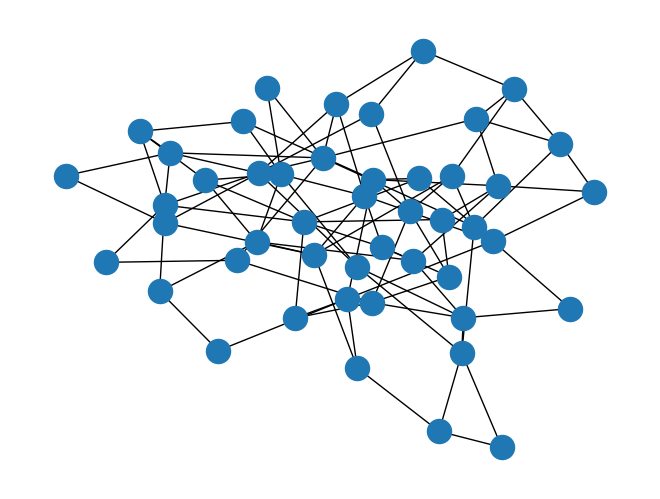

In [4]:
nx.draw( nx.node_link_graph(generate_graph()) )

In [7]:
for i in tqdm( range(10000) ):
    with open('/Users/ets/Dropbox/ML_Course_2023/homework3_2023/part2_message_passing/train_data/graph_'+str(i)+'.json','w') as outfile:
        json.dump(generate_graph(),outfile)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [9]:
for i in tqdm( range(10000) ):
    with open('/Users/ets/Dropbox/ML_Course_2023/homework3_2023/part2_message_passing/test_data/graph_'+str(i)+'.json','w') as outfile:
        json.dump(generate_graph(),outfile)

  0%|          | 0/10000 [00:00<?, ?it/s]